# COGS 108 - The Factors Behind a Country's Self-Perceived Happiness Score

# Overview

In this project, we will look at the survey results that World Happiness Report conducted over the years at several countries. Our team explored six factors (economy, health, family, freedom, generosity, trust) and their relationship with self-perceived happiness. We first visualized the relationships through scatter matrices then determined whether the factors had significant correlation with happiness through statstical tests. We then created a correlation matrix to find the factor that most affects self-perceived happiness of a country. In conclusion, we were able to discover that economy was the factor that contributes most to the average self-perceived happiness value of a country. 

# Names

- Chau Vu
- Jenny Yu
- Kyu Eun
- Mia Lucio

<a id='research_question'></a>
# Research Question

Which factor measured by the World Happiness Report contributes most to the average self-perceived happiness of a country?

<a id='background'></a>

## Background & Prior Work

Happiness is an important part of our lives and can provide us with a wide range of benefits such as better performance, health, and relationships (5). Knowing more about what contributes to happiness is important to help us improve our lifestyles. Especially with increased depression symptoms with the onset of COVID-19 (6), it is necessary to learn more about how to guide people and countries in leading happier lives. As Our World in Data states, there are potentially many factors such as life expectancy, economic growth, culture, and freedom that can be correlated with happiness (1). There are also numerous studies that suggest nurturing relationships and communities help us live longer and be happier (2). We thought it would be interesting to see how these different factors can be evaluated quantitatively and see their correlation to a country's overall self-perceived happiness. Our research question is of interest to us because we believe that finding a factor that contributes most to happiness could indicate to people and different countries how to improve overall life satisfaction. Our research question would not be indicative of a solution nor suggest direct correlations to happiness, but we believe that it can raise awareness and help guide happiness growth.

We decided to use data from the World Happiness Report, which is a survey that calculates the happiness score of 156 countries based on various national statistics and citizen ratings of their perception of their own lives (3). The survey implements questions that ask individuals about their economy, health, family, freedom, generosity, and trust. The responses from the survey were evaluated and indexed into an excel spreadsheet (4) which we will use for further data analysis in answering our research question.

References:

1) https://ourworldindata.org/happiness-and-life-satisfaction<br>
2) https://news.harvard.edu/gazette/story/2017/04/over-nearly-80-years-harvard-study-has-been-showing-how-to-live-a-healthy-and-happy-life/<br>
3) https://worldhappiness.report/<br>
4) https://s3.amazonaws.com/happiness-report/2018/WHR2018Chapter2OnlineData.xls <br>
5) https://www.theguardian.com/lifeandstyle/2014/nov/03/why-does-happiness-matter#:~:text=Happiness%20has%20also%20been%20linked,for%20society%20as%20a%20whole.<br>
6) https://www.cdc.gov/mmwr/volumes/69/wr/mm6932a1.htm#:~:text=Younger%20adults%2C%20racial%2F,and%20elevated%20suicidal%20ideation.

# Hypothesis


We hypothesize that out of the six factors measured (economy, health, family, freedom, generosity, trust), economy will be the most significant factor in determining a country’s happiness ranking. We predict that more wealth leads to a higher quality of life, which generally increases people’s perception of their overall happiness level.

# Dataset(s)

**Dataset Name:** World Happiness Report 2019<br>
Link to the dataset: https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls<br>
Number of observations: 1705<br>
Features: 26

**Description:**<br>
The World Happiness Report dataset is a compilation of survey results that is used to quantify and calculate the happiness score of 156 countries based on various factors like national statistics and citizen ratings of their life satisfaction.

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import geopandas as gpd
import json
from shapely.geometry import shape
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
df2019 = pd.read_excel("https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls")
countries = json.load(open('countries.geojson'))

In [3]:
countArr = countries["features"]
countArr = [item.get('properties').get('ADMIN') for item in countArr]

# Data Cleaning

**How 'clean' is the data?**
 - For 8 countries, there are columns that contains null values because no information was provided for those specific columns for any of the years. Some of these values are not available because relevant questions were not asked in certain countries during the survey. We decided drop these countries to prevent skews in data.
 
**What did you have to do to get the data into a usable format? (If you did nothing, how did you determine there was nothing to do?)**
 - Dropped factors we're not considering
 - Renamed the factors into more intuitive titles
 - Checked for missing values
 - Averaged out the years for each country
 
**What pre-processing steps that were required for your methods (for example, checking data distributions and performing any transformations that may be required)**
 - We initially did not pre-process the values because all the columns contained numberical values ,and we thought they were reasonable. However, we later realized the need to normalize the values from a scale of 0-1 since the factors were all measured differently.

In [4]:
# select columns we want
df2019 = df2019[['Country name', 'Life Ladder', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']]

# rename the columns
df2019.columns = ['Country', 'Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust']

df2019

,Country,Happiness,Economy,Family,Health,Freedom,Generosity,Trust
0,Afghanistan,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686
1,Afghanistan,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035
2,Afghanistan,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766
3,Afghanistan,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109
4,Afghanistan,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217
1700,Zimbabwe,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457
1701,Zimbabwe,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612
1702,Zimbabwe,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208


In [5]:
# check for missing values
df2019[df2019.isnull().any(axis=1)]

,Country,Happiness,Economy,Family,Health,Freedom,Generosity,Trust
22,Algeria,5.463567,9.462701,NaN,64.500000,0.592696,-0.229078,0.618038
25,Algeria,6.354898,9.509210,0.818189,65.139999,NaN,NaN,NaN
26,Algeria,5.340854,9.541166,0.748588,65.500000,NaN,NaN,NaN
59,Australia,7.340688,10.569470,0.967892,71.400002,0.934973,NaN,0.390416
98,Bahrain,5.027187,10.620359,0.911350,66.860001,0.681823,NaN,0.437915
...,...,...,...,...,...,...,...,...
1666,Vietnam,5.175279,8.727759,NaN,67.699997,NaN,NaN,NaN
1668,Yemen,4.477133,8.340983,0.824969,53.400002,0.672685,-0.005798,NaN
1676,Yemen,3.825631,7.299221,0.775407,55.099998,0.532964,-0.125668,NaN
1677,Yemen,3.253560,NaN,0.789555,55.900002,0.595191,NaN,NaN


In [6]:
# average out the values of all the years for each country
average = df2019.groupby('Country').mean() # .mean() excludes any null values

# null data that are displaying here happened because there is no data at all for those countries
average[average.isnull().any(axis=1)]

,Happiness,Economy,Family,Health,Freedom,Generosity,Trust
Country,,,,,,,
China,4.984993,9.284457,0.780020,67.969230,0.829893,-0.191763,NaN
Cuba,5.417869,9.676425,0.969595,68.440002,0.281458,NaN,NaN
North Cyprus,5.682304,NaN,0.829782,NaN,0.779380,NaN,0.700919
Oman,6.852982,10.648312,NaN,65.500000,0.916293,-0.008942,NaN
Somalia,5.183286,NaN,0.601511,49.899999,0.919690,NaN,0.435836
Somaliland region,4.909162,NaN,0.820706,NaN,0.795702,NaN,0.418910
Swaziland,4.539328,8.922841,0.808210,NaN,0.658565,-0.126601,0.804796
Turkmenistan,5.614522,9.517484,0.930100,60.826667,0.760401,-0.001878,NaN


In [7]:
average = average.dropna(subset=['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust'], axis=0)

average[average.isnull().any(axis=1)]

,Happiness,Economy,Family,Health,Freedom,Generosity,Trust
Country,,,,,,,


For comparison between true values and normalized data, to ensure our results are accurate we will be using a normalized dataset, where values in each column are scaled to be between 0 and 1. This is because each column has been measured with different units, and we did not want these differences to affect our outcomes

# Data Analysis

## Visualizing the Data
To begin our analysis, we will visualize the data set, to get a *feel* for the data.

In [8]:
average.head()

,Happiness,Economy,Family,Health,Freedom,Generosity,Trust
Country,,,,,,,
Afghanistan,3.705495,7.440942,0.516270,52.254545,0.529317,0.095981,0.835959
Albania,4.990211,9.262286,0.719602,67.254545,0.644161,-0.092908,0.863277
Algeria,5.481872,9.509817,0.803636,65.174286,0.545794,-0.198656,0.680923
Angola,4.420299,8.713990,0.737973,53.550000,0.455957,-0.077243,0.867018
Argentina,6.358951,9.825671,0.905605,67.715385,0.760258,-0.154914,0.844901


The dataset is indexed by country, and includes 7 columns of data describing each country. This is tabular data with observations in rows and variables in columns.

In [9]:
average.describe()

,Happiness,Economy,Family,Health,Freedom,Generosity,Trust
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,5.381305,9.156397,0.802591,62.467080,0.732039,0.006330,0.742032
std,1.084636,1.231093,0.116665,7.651613,0.127960,0.149878,0.180408
min,3.401875,6.598502,0.402559,43.356001,0.451014,-0.285515,0.100310
25%,4.433023,8.156726,0.743928,56.553846,0.638103,-0.107233,0.696182
50%,5.303918,9.262942,0.817398,64.616667,0.740151,-0.006155,0.794605
75%,6.232222,10.177019,0.895884,67.609091,0.824021,0.094308,0.853701
max,7.692072,11.721919,0.975919,75.213333,0.953140,0.628200,0.953108


In [10]:
average.shape

(157, 7)

In [11]:
average.dtypes

Happiness     float64
Economy       float64
Family        float64
Health        float64
Freedom       float64
Generosity    float64
Trust         float64
dtype: object

Our dataset has 157 rows, describing 157 different countries. It contains mostly float data, with the exception of the country and geometry columns which we added in pre-processing to aid in data visualization.

We will be analyzing the relationship between the Happiness score and each column variable. We start by comparing their distributions.

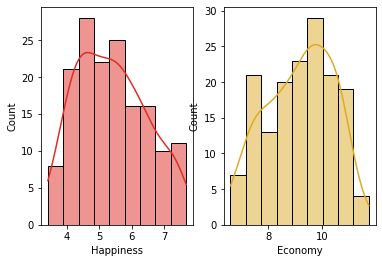

In [12]:
plt.subplot(1, 2, 1)
sns.histplot(average['Happiness'], color='#DE2D26', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(average['Economy'], color='#DEAA26', kde=True);

The distribution of economy appears to be unimodal and relatively normal.

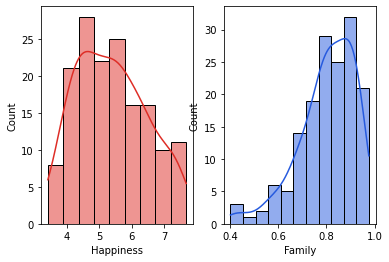

In [13]:
plt.subplot(1, 2, 1)
sns.histplot(average['Happiness'], color='#DE2D26', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(average['Family'], color='#265ADE', kde=True);

The distribution of family appears unimodal but slightly skewed to the left.

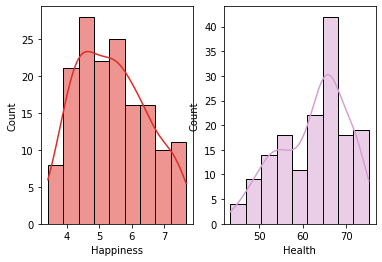

In [14]:
plt.subplot(1, 2, 1)
sns.histplot(average['Happiness'], color='#DE2D26', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(average['Health'], color='#d69fd3', kde=True);

The distribution of health appears unimodal and fairly normally distributed.

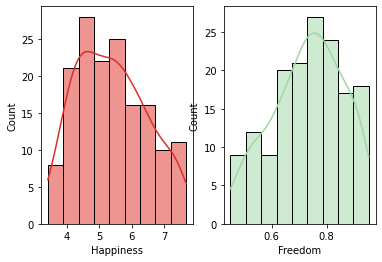

In [15]:
plt.subplot(1, 2, 1)
sns.histplot(average['Happiness'], color='#DE2D26', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(average['Freedom'], color='#9FD6A2', kde=True);

The distribution of freedom appears unimodal and fairly normally distributed.

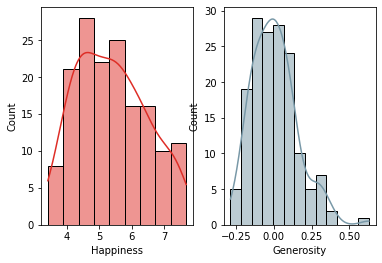

In [16]:
plt.subplot(1, 2, 1)
sns.histplot(average['Happiness'], color='#DE2D26', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(average['Generosity'], color='#7898a7', kde=True);

The distribution of generosity appears unimodal but slightly skewed to the right.

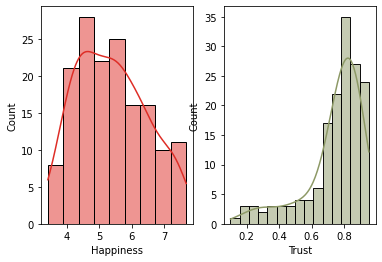

In [17]:
plt.subplot(1, 2, 1)
sns.histplot(average['Happiness'], color='#DE2D26', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(average['Trust'], color='#8D9966', kde=True);

The distribution of trust appearas unimodal but strongly skewed to the left.

To get a sense of the range of happiness scores, and which countries have higher or lower scores, we visualize this data in a bargraph.

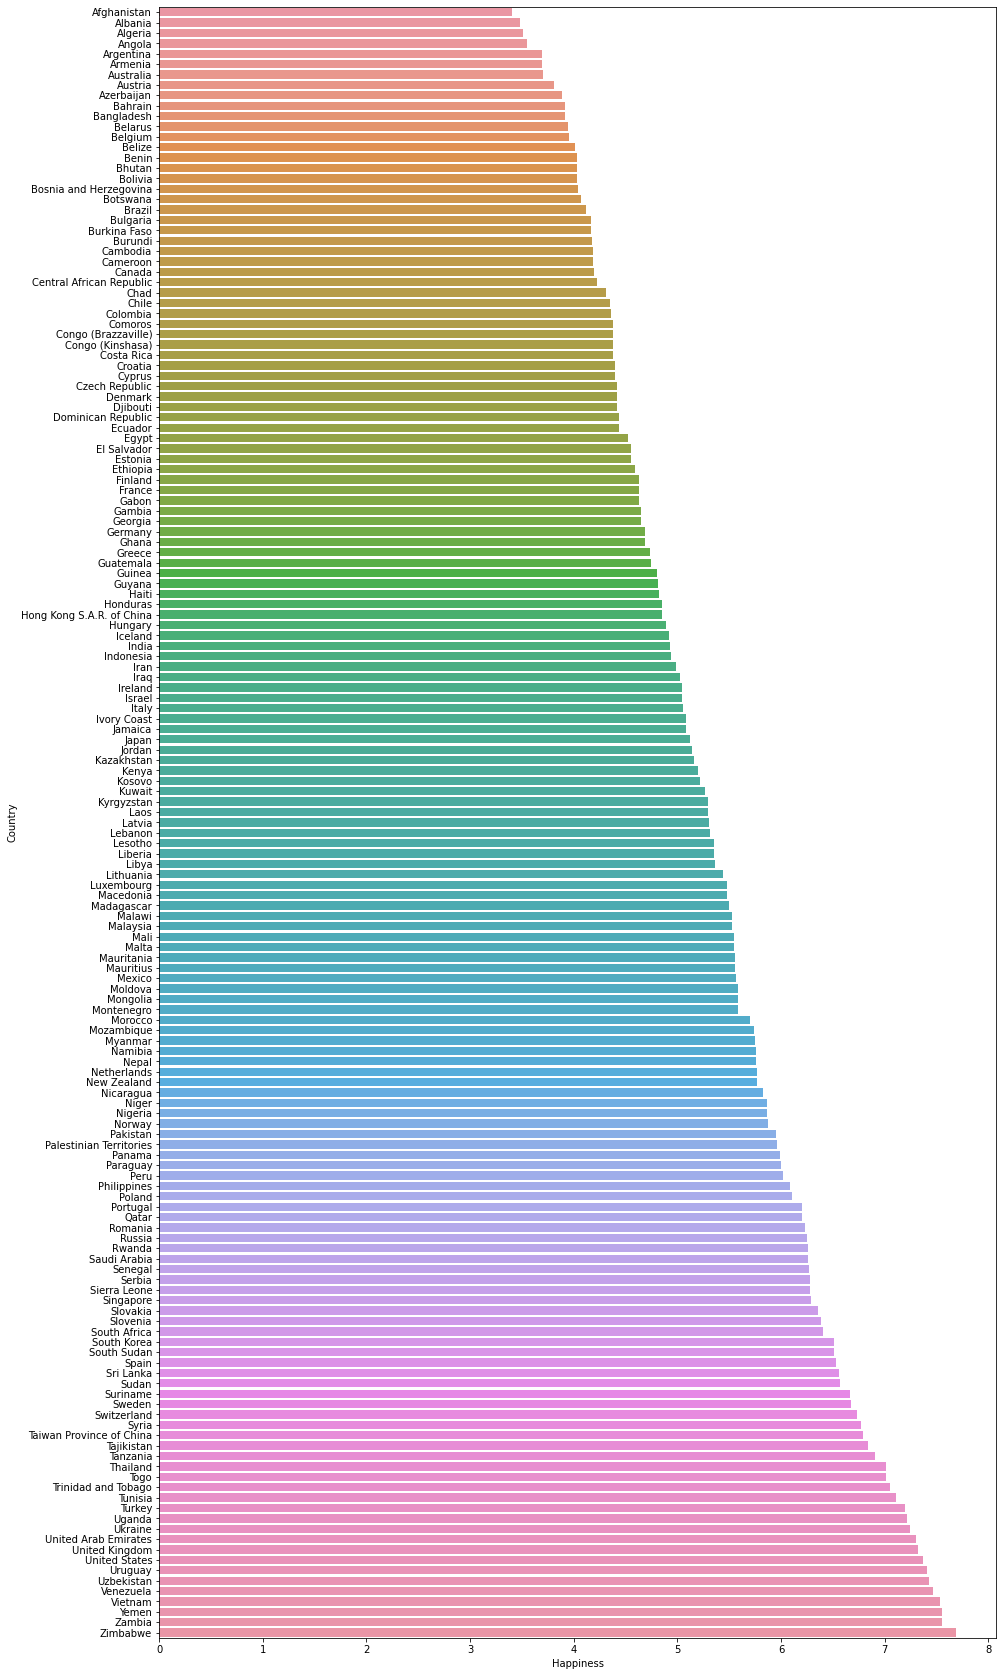

In [18]:
b_dims = (15, 30)
fig, b = plt.subplots(figsize=b_dims)
b = sns.barplot(x="Happiness", y=average.index, data=average.sort_values(by='Happiness'))
sns.set(font_scale = 1.0)
fig = plt.gcf()

In [19]:
def insertGeom(country):
    if country in countArr:
        return shape(countries['features'][countArr.index(country)]["geometry"])
    else:
        return np.NaN

In [20]:
countHapp = pd.DataFrame(data={"country": average.index})
countHapp = countHapp.replace('United States', 'United States of America')
countHapp['geometry'] = countHapp['country'].apply(insertGeom)
countHapp["Happiness"] = average['Happiness'].values

In [21]:
countHapp.head()

,country,geometry,Happiness
0,Afghanistan,"POLYGON ((71.04980228700009 38.40866445000009,...",3.705495
1,Albania,"POLYGON ((19.74776574700007 42.57890085900007,...",4.990211
2,Algeria,"POLYGON ((8.602510428642177 36.93951076347057,...",5.481872
3,Angola,(POLYGON ((11.73751945100014 -16.6925779829998...,4.420299
4,Argentina,(POLYGON ((-68.65412350199998 -54.886244398999...,6.358951


In [22]:
gdf = gpd.GeoDataFrame(countHapp)

To get a sense of which countries we are looking at, we decided to visualize the happiness score of each country that was surveyed on the map.

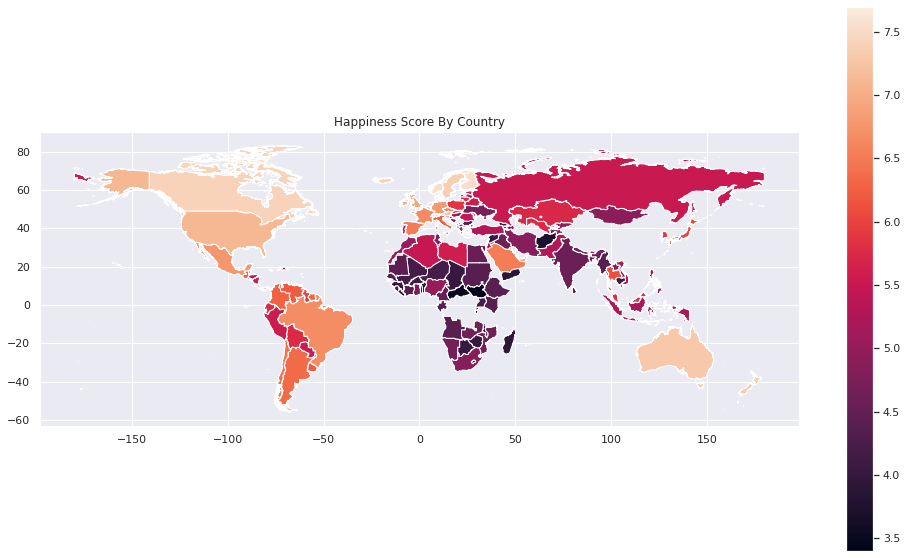

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
divider = make_axes_locatable(ax)
gdf.plot(column='Happiness', ax=ax, legend=True);
ax.set_title('Happiness Score By Country');

## Data Analysis & Results
To further examine the relationships between the variables, we continue our analysis by visualizing their scatterplots.

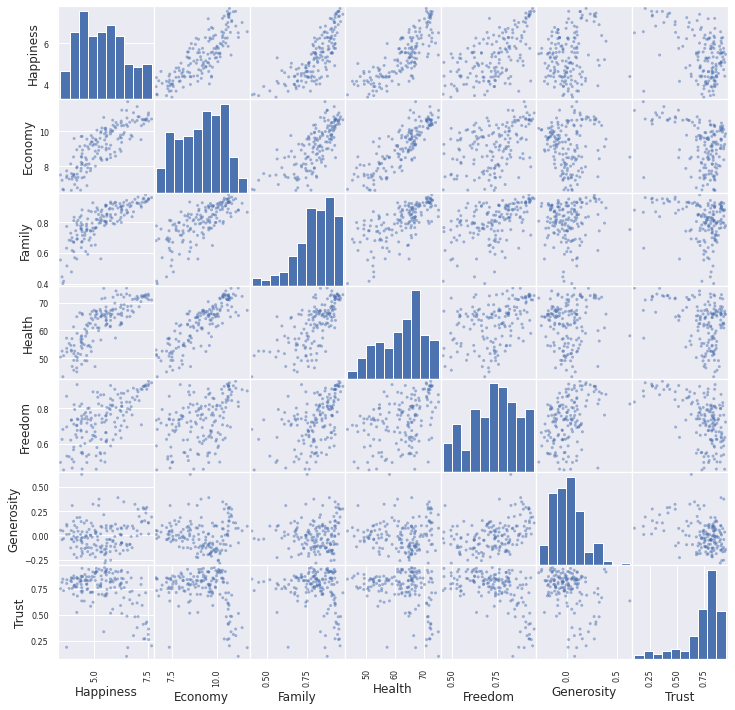

In [24]:
fig = pd.plotting.scatter_matrix(average, figsize=(12, 12))

From the scatter matrix, it seems that factors like Family, Economy, Freedom, and Health are positively correlated with Happiness, but it is difficult to tell how strongly they are correlated just from looking at a scatterplot.

For the OLS Regression Results below, we will use the following statistical hypotheses:

Null Hypothesis - there is no correlation between a factor of a country and that country's self-perceived happiness.

Alternative Hypothesis - there is a correlation between the country's measured factor and self-perceived happiness.

We will be using an alpha value of 0.05 to compare with the p-values.

In [25]:
outcome, predictors = patsy.dmatrices('Happiness ~ Economy + Family + Health + Freedom + Generosity + Trust', average)
model = sm.OLS(outcome, predictors)

In [26]:
## fit the model
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.02e-53
Time:                        21:40:03   Log-Likelihood:                -100.08
No. Observations:                 157   AIC:                             214.2
Df Residuals:                     150   BIC:                             235.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1051      0.486     -4.329      0.0

After reviewing the results from the regression, we noticed that our results may be skewed because of differences in the measurements between each column. For example, health is measured by average lifespan in years, while economy is measured in log GDP per capita. Therefore, we decided to normalize the data so that the values from each column are scaled between 1 and 0 in order to make sure that all values are on an even scale for comparison.

In [27]:
normalized_df=(average-average.min())/(average.max()-average.min())

In [28]:
norm_outcome, norm_predictors = patsy.dmatrices('Happiness ~ Economy + Family + Health + Freedom + Generosity + Trust', normalized_df)
norm_model = sm.OLS(norm_outcome, norm_predictors)

In [29]:
## fit the model
norm_results = norm_model.fit()

print(norm_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.02e-53
Time:                        21:40:03   Log-Likelihood:                 128.56
No. Observations:                 157   AIC:                            -243.1
Df Residuals:                     150   BIC:                            -221.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1612      0.063     -2.562      0.0

We are using the results from the normalized dataset to make decisions for our hypothesis, because these values are on an even scale. 

According to the linear regression summary, the p-values of both Generosity and Trust exceed the alpha value of 0.05, so we fail to reject the null hypothesis that there is no correlation between these two factors and self-perceived happiness.

Since the R-squared value, 0.821, is relatively high, we can conclude that these combined factors are a good predictor of self-perceived happiness.

Text(0, 0.5, 'Happiness')

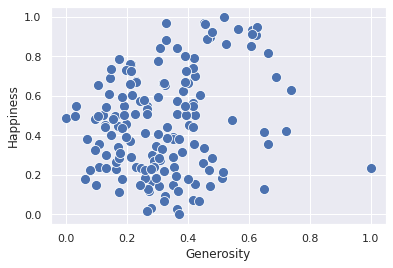

In [30]:
sns.scatterplot(x='Generosity', y='Happiness', data=normalized_df, s=100)
plt.xlabel('Generosity')
plt.ylabel('Happiness')

Text(0, 0.5, 'Happiness')

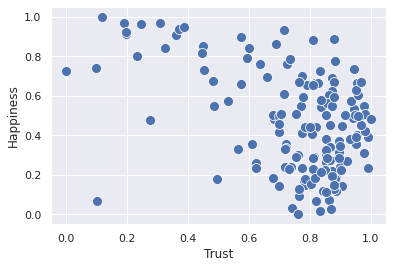

In [31]:
sns.scatterplot(x='Trust', y='Happiness', data=normalized_df, s=100)
plt.xlabel('Trust')
plt.ylabel('Happiness')

From the scatterplots above, we can see that there is no distinct correlation between self-perceived happiness and the two factors, generosity and trust.

Since the p-values for Trust and Generosity are greater than the alpha value of 0.05, we decided to try doing the multiple linear regression without those factors.

In [32]:
norm_outcome, norm_predictors = patsy.dmatrices('Happiness ~ Economy + Family + Health + Freedom', normalized_df)
norm_model = sm.OLS(norm_outcome, norm_predictors)

In [33]:
## fit the model
norm_results = norm_model.fit()

print(norm_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     163.2
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.04e-54
Time:                        21:40:04   Log-Likelihood:                 124.46
No. Observations:                 157   AIC:                            -238.9
Df Residuals:                     152   BIC:                            -223.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2184      0.034     -6.462      0.0

Since the R-squared value of 0.811 is less than the R-squared value of 0.821 from the regression with all factors, we can see that though it's minimal, there is still some correlation between Trust and Generosity with Happiness.

We first start out by looking at the correlation between a country's self-perceived happiness score and their average log GDP per capita over the range of years that they reported their survey results to the World Happiness Survey. To take a closer look at the scatterplot visualizing the correlation from above, we show the scatterplot here.

Text(0, 0.5, 'Happiness')

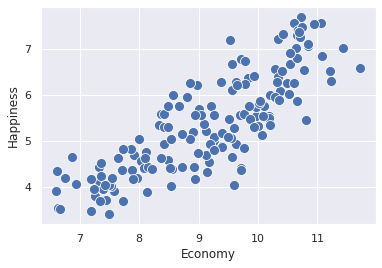

In [34]:
sns.scatterplot(x='Economy', y='Happiness', data=average, s=100)
plt.xlabel('Economy')
plt.ylabel('Happiness')

From the scatterplot, we can see that the two variables have a positive correlation, so we continue running a linear regression, only taking into account the economy factor.

In [35]:
econ_outcome, econ_predictors = patsy.dmatrices('Happiness ~ Economy', average)
econ_model = sm.OLS(econ_outcome, econ_predictors)
## fit the model
econ_results = econ_model.fit()

print(econ_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     334.7
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.48e-40
Time:                        21:40:04   Log-Likelihood:                -144.73
No. Observations:                 157   AIC:                             293.5
Df Residuals:                     155   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2879      0.368     -3.502      0.0

The p-value is less than the alpha value of 0.05, so we reject the null hypothesis. There is enough evidence to support the alternative hypothesis that there is a correlation between economy and self-perceived happiness.

Text(0, 0.5, 'Happiness')

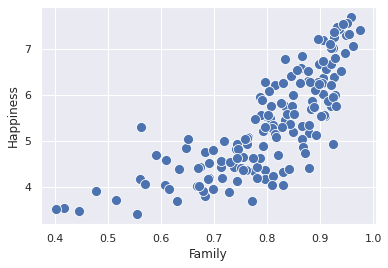

In [36]:
sns.scatterplot(x='Family', y='Happiness', data=average, s=100)
plt.xlabel('Family')
plt.ylabel('Happiness')

In [37]:
fam_outcome, fam_predictors = patsy.dmatrices('Happiness ~ Family', average)
fam_model = sm.OLS(fam_outcome, fam_predictors)
## fit the model
fam_results = fam_model.fit()

print(fam_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     243.1
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.47e-33
Time:                        21:40:05   Log-Likelihood:                -160.99
No. Observations:                 157   AIC:                             326.0
Df Residuals:                     155   BIC:                             332.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4494      0.378     -1.189      0.2

The p-value is less than the alpha value of 0.05, so we reject the null hypothesis. There is enough evidence to support the alternative hypothesis that there is a correlation between family and self-perceived happiness.

Text(0, 0.5, 'Happiness')

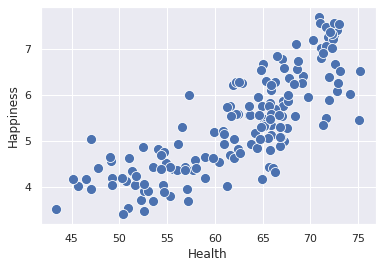

In [38]:
sns.scatterplot(x='Health', y='Happiness', data=average, s=100)
plt.xlabel('Health')
plt.ylabel('Happiness')

In [39]:
h_outcome, h_predictors = patsy.dmatrices('Happiness ~ Health', average)
h_model = sm.OLS(h_outcome, h_predictors)
## fit the model
h_results = h_model.fit()

print(h_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     284.2
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.95e-37
Time:                        21:40:05   Log-Likelihood:                -153.26
No. Observations:                 157   AIC:                             310.5
Df Residuals:                     155   BIC:                             316.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7418      0.426     -4.092      0.0

The p-value is less than the alpha value of 0.05, so we reject the null hypothesis. There is enough evidence to support the alternative hypothesis that there is a correlation between health and self-perceived happiness.

Text(0, 0.5, 'Happiness')

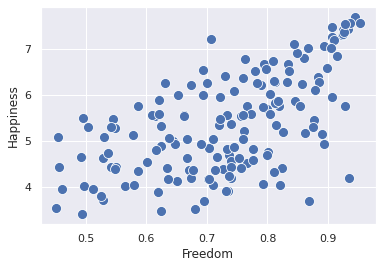

In [40]:
sns.scatterplot(x='Freedom', y='Happiness', data=average, s=100)
plt.xlabel('Freedom')
plt.ylabel('Happiness')

In [41]:
f_outcome, f_predictors = patsy.dmatrices('Happiness ~ Freedom', average)
f_model = sm.OLS(f_outcome, f_predictors)
## fit the model
f_results = f_model.fit()

print(f_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     88.52
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.54e-17
Time:                        21:40:05   Log-Likelihood:                -199.56
No. Observations:                 157   AIC:                             403.1
Df Residuals:                     155   BIC:                             409.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6403      0.404      4.064      0.0

The p-value is less than the alpha value of 0.05, so we reject the null hypothesis.

In [42]:
print("Family:", fam_results.rsquared)
print("Health:", h_results.rsquared)
print("Freedom:", f_results.rsquared)
print("Economy:", econ_results.rsquared)

Family: 0.6106131698319415
Health: 0.6471036944612707
Freedom: 0.3634932897055082
Economy: 0.683463126519243


### Conclusion for Relationship between Factors & Self-Perceived Happiness
After running the regressions of the 4 most strongly correlated factors, we can tell from the R-squared values, which indicate how closely each model fits the data, that Economy has the highest coefficient of determination with self-perceived happiness, followed by Health, Family, and then Freedom.

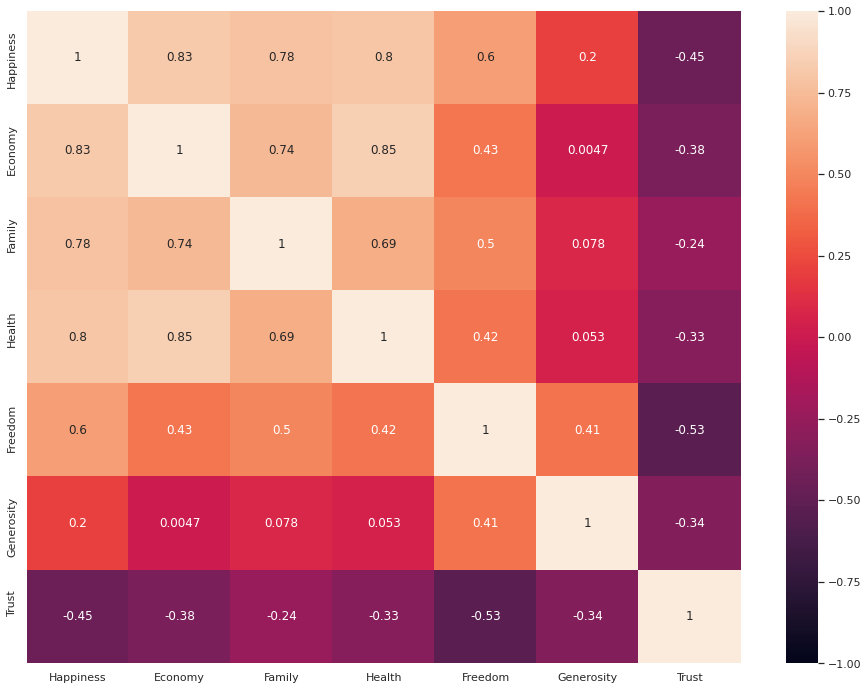

In [43]:
plt.figure(figsize = (16,12))
heatmap = sns.heatmap(average.corr(), vmin=-1, vmax=1, annot=True)
plt.yticks(np.arange(7)+0.25, average.columns);

The correlation matrix heatmap confirms our hypothesis from comparing the linear regressions that Economy is the factor most highly correlated with self-perceived happiness.

# Ethics & Privacy

The dataset being used is public data given by the country so there are no privacy issues and personal data being exposed. Some countries might not welcome the idea of being ranked lower on the happiness ladder. However, since World Happiness Report publicizes the rankings each year, we decided to go forward with this public data for our research question with a focus on learning more about the different factors.

There are potential biases in our dataset where not every country in the world is included in the dataset. Survey responses could also be affected by demographics and the particular area within the country that was observed. We will seek to understand why certain countries are not included in the report and determine whether their exclusion may have an impact on our results. We will acknowledge that the data isn’t a certified and accurate representation of a country’s happiness, as there are a lot of other factors not measured (for example, natural disasters) that could potentially impact a country’s happiness. We will be more careful in drawing conclusions with the potential biases in mind. To do this, we will try to refrain from pinpointing any particular country in our report and conclusions.

In terms of impact, our data analysis can be used to learn more about which factors affect happiness to what extent. The results can guide countries and their people on how to promote happier lifestyles by informing them what changes could be implemented and where. We hope that countries ranked lower on the happiness ladder could find our results helpful in making essential decisions by encouraging policy makers to make the happiness of their people the goal of their policies. All in all, we wish that our data analysis has a positive impact and encourages upward shifts in the happiness ladder.

# Conclusion & Discussion

For this project, we aim to see whether there are significant correlations between the six factors and happiness and ultimately determine the factor that most affects self-perceived happiness. We hypothesized that the economy would be the most significant factor that determines a country's self-perceived happiness. In conclusion from our overall data analysis, we were correct that economy was the factor that affects happiness the most.

Through our data analysis, we were able to find enough evidence to support our hypothesis. Initially, we observed through the scatter matrix that there were positive correlations between happiness and economy, family, health, and freedom. It was surprising to see that there was an undeterminable correlation between happiness and generosity and trust in government just from the scatter matrix. Conducting an OLS Regression model of all the factors helped us clarify which have a significant correlation with happiness by looking at the P-values. Like our initial observation, economy, family, health, and freedom are correlated with happiness while generosity and trust have little correlation with happiness. We then conducted the OLS Regression model for each factor in order to see which has the highest R-squared value. We discovered that economy had the highest R-squared value which suggests that the economy model closely fits the data and has a strong relationship with happiness. We then created a correlation matrix and were able to come to a conclusion that economy was the factor that affected happiness the most. From further research, more wealth enabled countries to better provide their citizens and this reinforces our hypothesis that higher levels of wealth can increase people’s perception of happiness (1).

Looking back at the data analysis we did, we notice that there were some limitations. One of them is the potential issue of multicollinearity. We realize that the six factors we assessed could be correlated with each other (for example economy and health could be highly correlated) which could skew the results in our regression model. In addition, there could be factors, other than the ones we tested, that contribute largely to happiness. Another is the survey results that the World Happiness Report gathered. Some countries may have certain positive or negative events that occur over a span of time that may affect how they respond to the survey. Although we averaged the values from all the years (up to 2019) for each country to balance the differences, the averages could be skewed.

Reference: <br>
1) https://blogs.ei.columbia.edu/2015/04/23/why-happiness-is-important/ 


# Team Contributions

- Chau Vu: Overview, RQ, Hypothesis, Slides, Dataset, Data Cleaning, Data Analysis, Final Checks
- Jenny Yu: Overview, RQ, Hypothesis, Slides, Ethics/Privacy, Conclusion/Discussion, Final Checks
- Kyu Eun: Overview, RQ, Hypothesis, Slides, Background, Ethics/Privacy, Conclusion/Discussion, Final Checks
- Mia Lucio: Overview, RQ, Hypothesis, Slides, Data Cleaning, Data Visualization, Data Analysis, Video Edit, Final Checks